In [1]:
!gdown 12Qe6uByGafF2gbJ3ekZSZ2iPN3roZaZF

Downloading...
From: https://drive.google.com/uc?id=12Qe6uByGafF2gbJ3ekZSZ2iPN3roZaZF
To: C:\Users\Asus\my python\DSML\aerosoft.txt

  0%|          | 0.00/7.28k [00:00<?, ?B/s]
100%|##########| 7.28k/7.28k [00:00<?, ?B/s]


In [2]:
import matplotlib
matplotlib.__version__

'3.3.4'

In [3]:
!pip install matplotlib

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("aerosoft.txt")

### Problem statement
To identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

In [5]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


We can see that the data has 180 rows and 9 columns, out of which Product, Gender and MaritalStatus are object data type rest are integers. We see that there are no null values and hence no missing value treatment required.

In [7]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [8]:
median = df.median()
mean = df.mean()
mean_median =pd.concat([mean,median], axis=1)
mean_median=mean_median.rename(columns={0:"Mean",1:"Median"})
mean_median

,Mean,Median
Age,28.788889,26.0
Education,15.572222,16.0
Usage,3.455556,3.0
Fitness,3.311111,3.0
Income,53719.577778,50596.5
Miles,103.194444,94.0


Most people who buy the products are around 26 and have an education of 16 years.

In [9]:
sale= pd.crosstab(index=df["Gender"],columns=df["Product"],margins=True,margins_name="Total")
sale

Product,KP281,KP481,KP781,Total
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
Total,80,60,40,180


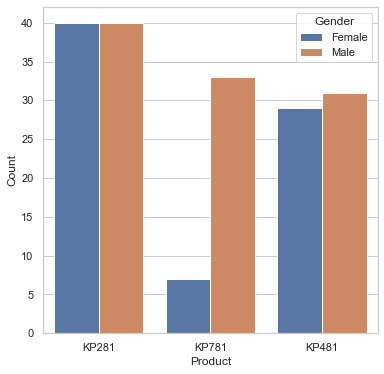

In [10]:
new_df = df[["Product","Gender"]].value_counts()
new_df = new_df.reset_index()
new_df.rename(columns={0:"Count"},inplace=True)
new_df

plt.figure(figsize=(6,6))
sns.set_theme(style="whitegrid")

plot = sns.barplot(data = new_df,x="Product",y="Count",hue="Gender") 
plt.show()

Out of total sales KP281 is the most selling product. This may be depend on their income or preference.Most of the customers might be from low income category. We will see the income catogarization later.

In [11]:
pd.crosstab(index=[df["Gender"]],columns=[df['Product']],margins=True,margins_name="Total",values=df["Miles"],aggfunc="sum")

Product,KP281,KP481,KP781,Total
Gender,,,,
Female,3048,2533,1260,6841
Male,3575,2743,5416,11734
Total,6623,5276,6676,18575


Alomst same amount number of miles are expected in kp281 and kp781 male and female combined.Male members who bought kp781, the most expensive one expect the highest miles.It seems that men expect more miles out of all three products.

In [12]:
# plot_data = sale.loc[:,"Total"]
# sns.set_theme(style="whitegrid")
# plt.bar(plot_data.index[0:-1],plot_data[0:-1])
# plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

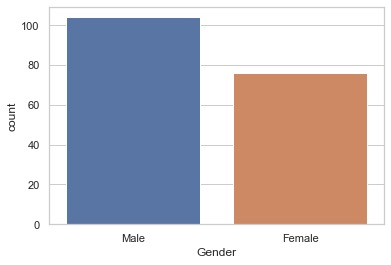

In [13]:
sns.countplot(x = df["Gender"])

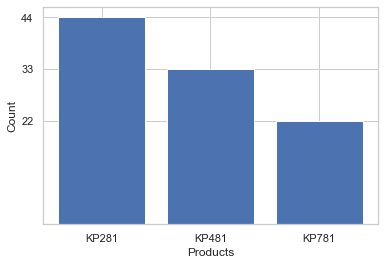

In [14]:
tot = df.shape[0]
ind = df["Product"].value_counts().index
ind
vals = df["Product"].value_counts().values
vals
lis=[]
for i,j in zip(ind,vals):
    lis.append(round(j*100/tot))
    
plot_data = pd.Series(index = ind,data=lis,name = "pct_user")
x=plot_data.index
p = plt.bar(x,plot_data)
plt.ylabel("Count")
plt.xlabel("Products")
plt.yticks(plot_data)
sns.set_theme(style="whitegrid")
plt.show()

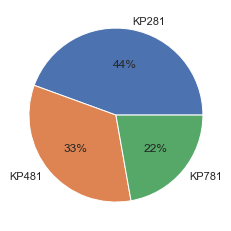

In [15]:
# plt.pie(plot_data[0:-1],labels=plot_data[0:-1].index,autopct="%.0f%%")
plt.pie(plot_data,labels=plot_data.index,autopct="%.0f%%")

sns.set_theme(style="whitegrid")
plt.show()

Kp281 the cheapest is sold the most. It tops the sales with 44% of total. A 33% sales for kp481, the mid varient and 22% for kp781.

In [16]:
sale_new = pd.crosstab(index=df["Gender"],columns=df["Product"])

In [17]:
# plt.figure(figsize=(5,5))
# plt.rcParams["figure.figsize"] = [2.50, 5.0]
# plt.rcParams["figure.autolayout"] = True
 
# b1 = plt.bar(sale_new["KP281"].index,sale_new["KP281"])

# b2 = plt.bar(sale_new["KP481"].index,sale_new["KP481"])
# b3 = plt.bar(sale_new["KP781"].index,sale_new["KP781"])
# plt.legend([b1,b2,b3],["KP281", "KP481","KP781"], title="Products", loc="upper right")
# plt.show()


In [18]:
# new_df = df[["Product","Gender"]].value_counts()
# new_df = new_df.reset_index()
# new_df.rename(columns={0:"Count"},inplace=True)
# new_df

# plt.figure(figsize=(6,6))
# sns.set_theme(style="whitegrid")

# plot = sns.barplot(data = new_df,x="Product",y="Count",hue="Gender") 
# plt.show()


In [19]:
print(df["Education"].min(),
df["Education"].max())

12 21


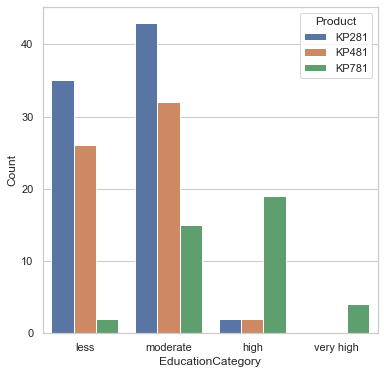

In [20]:
cutable = df.copy()
cutable
cutable["EducationCategory"] = pd.cut(cutable["Education"],4,labels=["less","moderate","high","very high"])
cutable["EducationCategory"].value_counts()
product_asper_edu = cutable.groupby(["EducationCategory","Product"])["Product"].agg("count")

product_asper_edu.name = "P"
product_asper_edu = product_asper_edu.reset_index()
product_asper_edu.rename(columns={"P":"Count"},inplace=True)
product_asper_edu


plt.figure(figsize=(6,6))

sns.set_theme(style="whitegrid")

sns.barplot(data=product_asper_edu,x="EducationCategory",y="Count",hue="Product")
plt.show()

If we randomly choose a customer he/she will most probably have less to moderate education. These category people tend to buy kp281 or kp481. Highly educated and very high educated customers prefer kp781 as they are willing to go for the top version for a better product.

In [21]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


<AxesSubplot:xlabel='Product', ylabel='Count'>

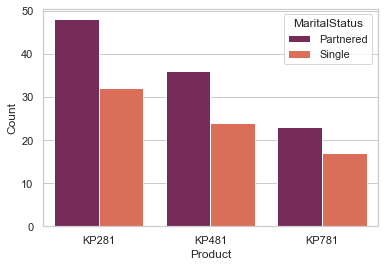

In [22]:
status_effect = df.groupby(["MaritalStatus","Product"])["Product"].count()
status_effect.name = "Count"
status_effect=status_effect.reset_index()
sns.barplot(data = status_effect,x="Product",y="Count",hue="MaritalStatus",palette="rocket")

status_effect

Married men and women contribute more to sales in all 3 types of products compared to single people. 

In [23]:
df["Age"].min(),df["Age"].max()

(18, 50)

<AxesSubplot:xlabel='Age_category', ylabel='Count'>

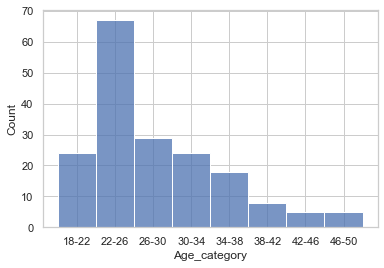

In [24]:
age_category = df.copy()
age_category["Age_category"] = pd.cut(age_category["Age"],8,labels=["18-22","22-26","26-30","30-34","34-38","38-42","42-46","46-50"])
age_category
sns.histplot(data =age_category ,x="Age_category")

<AxesSubplot:xlabel='Product', ylabel='Age_category'>

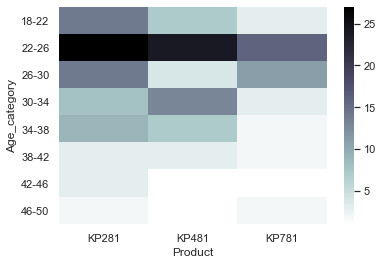

In [25]:
age_heatMap = pd.crosstab(index = age_category["Product"],columns=age_category["Age_category"],values=age_category["Product"],aggfunc="count")
sns.heatmap(age_heatMap.T,cmap="bone_r")

People in range 22 to 26 tend to buy the products. As young people like to keep themselves fit, they are the once who contribute to most of the sales in fitness products.

<AxesSubplot:xlabel='Age'>

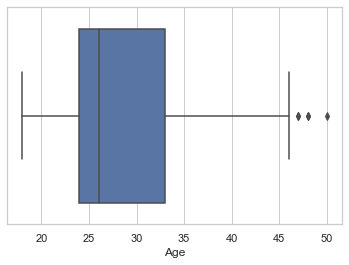

In [26]:
sns.boxplot(data = df,x="Age")

In [27]:
age_category = age_category.loc[:,["Product","Age","Age_category"]]

In [28]:
plot_data = age_category[["Age_category","Product"]].value_counts().reset_index()
plot_data.rename(columns = {0:"Count"},inplace=True)
plot_data

,Age_category,Product,Count
0,22-26,KP281,27
1,22-26,KP481,24
2,22-26,KP781,16
3,18-22,KP281,14
4,26-30,KP281,14
5,30-34,KP481,13
6,26-30,KP781,11
7,34-38,KP281,9
8,30-34,KP281,8
9,18-22,KP481,7


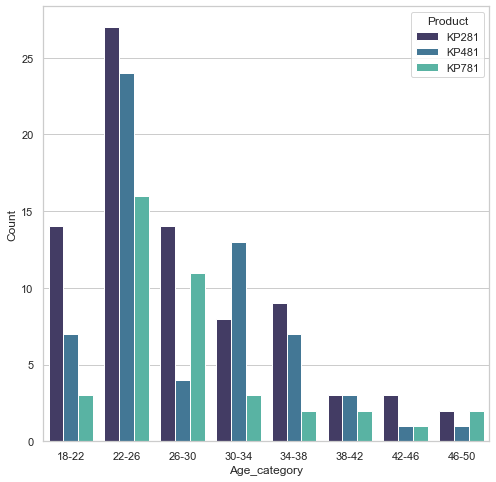

In [29]:
plt.figure(figsize=(8,8))
sns.barplot(data = plot_data,x="Age_category",y="Count",hue="Product",palette="mako")
plt.show()

As we know people in the age of 22 to 26 are the prime customers, the probability of them buying kp281 or kp481 is higher.  

In [30]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [31]:
df["Fitness"].unique()

array([4, 3, 2, 1, 5], dtype=int64)

Median:  3.0


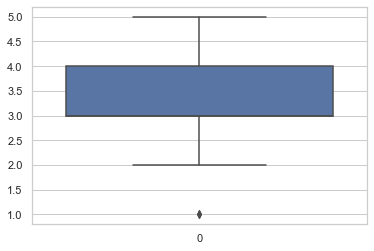

In [32]:
sns.boxplot(data = df["Fitness"])
print("Median: ",df["Fitness"].median())

Most people buying the fitness equipments are in a scale of 3 out of 5 levels of fitness.

<AxesSubplot:xlabel='Fitness', ylabel='Count'>

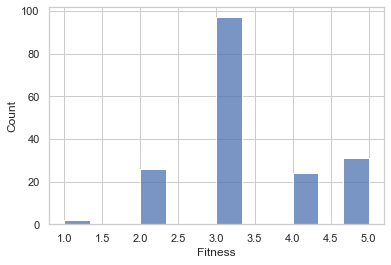

In [33]:
sns.histplot(data = df["Fitness"])

The probability of a person buying a product given that he/she is a fitness 3 level is more when compared to others.

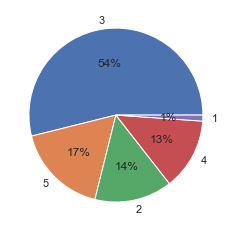

In [34]:
new= df["Fitness"].value_counts()
new.index
plt.pie(df["Fitness"].value_counts(),labels=new.index,autopct="%.0f%%")
plt.show()

54% of the people buying the product are level 3 fit and 17% are 5 and so on.

In [35]:
fitness = df.groupby("Fitness")["Product"].value_counts()
fitness.name="Count"
fitness = fitness.reset_index()

<AxesSubplot:xlabel='Fitness', ylabel='Count'>

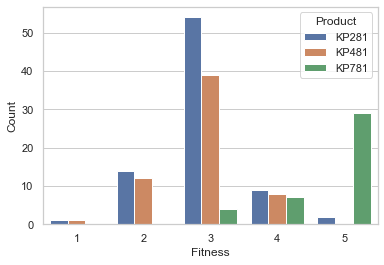

In [36]:
sns.barplot(data = fitness,x="Fitness",y="Count",hue="Product")

As we know most of the  customers are level 3 in fitness, most of these people tend to buy either kp281 or kp481. we see that the highest sold product in the fitness level 5 is kp781. As kp781 is the most expensive one, it may have some advanced features that the most fit customers(lvl 5) might prefer overr the other lower varients.

In [37]:
# income catogarize

In [38]:
print(df["Income"].min(),df["Income"].max(),df["Income"].mean(),np.std(df["Income"]))


29562 104581 53719.57777777778 16460.76846490047


In [39]:
df["Income"].describe()


count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

An average customer has about 53k income.The lowest is 29k and the highest is 100k. 25% percent customers have less than 44k and 50% have less than 50k income.

In [40]:
p_25 = np.percentile(df["Income"],25)
p_75 = np.percentile(df["Income"],75)

iqr = p_75-p_25
iqr
lower = p_25-1.5*iqr
lower
upper = p_75+1.5*iqr
lower,upper

(22144.875, 80581.875)

In [41]:
income = df[(df["Income"] <= upper) & (df["Income"]>=lower)]
# income = df[df["Income"]>=lower]
income

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
156,KP781,25,Male,20,Partnered,4,5,74701,170
157,KP781,26,Female,21,Single,4,3,69721,100
158,KP781,26,Male,16,Partnered,5,4,64741,180
163,KP781,28,Male,18,Partnered,7,5,77191,180


<AxesSubplot:xlabel='Income', ylabel='Density'>

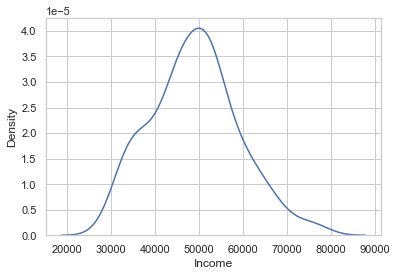

In [42]:
sns.kdeplot(data=income["Income"].round())

<AxesSubplot:>

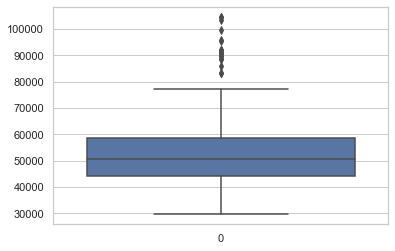

In [43]:
sns.boxplot(data = df["Income"])

In [44]:
new_df=df.copy()
new_df["IncCat"]=pd.cut(new_df["Income"],bins=3,labels=["LowIncome","MediumIncome","HighIncome"])
new_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,IncCat
0,KP281,18,Male,14,Single,3,4,29562,112,LowIncome
1,KP281,19,Male,15,Single,2,3,31836,75,LowIncome
2,KP281,19,Female,14,Partnered,4,3,30699,66,LowIncome
3,KP281,19,Male,12,Single,3,3,32973,85,LowIncome
4,KP281,20,Male,13,Partnered,4,2,35247,47,LowIncome
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,HighIncome
176,KP781,42,Male,18,Single,5,4,89641,200,HighIncome
177,KP781,45,Male,16,Single,5,5,90886,160,HighIncome
178,KP781,47,Male,18,Partnered,4,5,104581,120,HighIncome


In [45]:
#heatmap hue = inccat vs gender vs product

In [46]:
cross_tab_data =new_df.groupby(["Gender","IncCat"])["Product"].value_counts()
cross_tab_data.name="Count"
cross_tab_data = cross_tab_data.reset_index()
cross_tab_data

,Gender,IncCat,Product,Count
0,Female,LowIncome,KP281,32
1,Female,LowIncome,KP481,23
2,Female,LowIncome,KP781,2
3,Female,MediumIncome,KP281,8
4,Female,MediumIncome,KP481,6
5,Female,MediumIncome,KP781,2
6,Female,HighIncome,KP781,3
7,Male,LowIncome,KP281,30
8,Male,LowIncome,KP481,24
9,Male,LowIncome,KP781,6


In [47]:
cross_tab_data
heatMap_data =pd.crosstab(index=cross_tab_data["Gender"],columns=[cross_tab_data["IncCat"],cross_tab_data["Product"]],values=cross_tab_data["Count"],aggfunc="sum")
heatMap_data

IncCat  LowIncome             MediumIncome             HighIncome            
Product     KP281 KP481 KP781        KP281 KP481 KP781      KP281 KP481 KP781
Gender                                                                       
Female         32    23     2            8     6     2          0     0     3
Male           30    24     6           10     7    11          0     0    16

<AxesSubplot:xlabel='Gender', ylabel='IncCat-Product'>

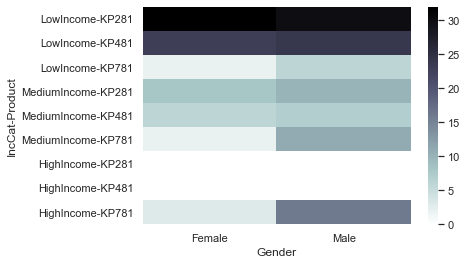

In [48]:
sns.heatmap(heatMap_data.T,cmap="bone_r")

It is obvious that low income male and female customers buy kp281. Mid income male tend to buy the most expensive and high income male customers buy the most expensive product.

In [49]:
# df["Miles"].unique()
new_df.groupby(["IncCat"])["Education"].median()

IncCat
LowIncome       15
MediumIncome    16
HighIncome      18
Name: Education, dtype: int64

Low income have 15 or less years of education, mid income have around 16 years of education and the high income customer have 18+ years of education

## Business Insights

- Most of the customers are between age 22-26 and arer educated for atleast 16 years.
- Male customers contribute more to sales when compared to women.
- The sale quantity of kp281 is higher compared to other two.
- Most customers are either less educated or have a moderate level of edication.
- High and very high educated buy the most expensive one but in a smaller quantity.
- Most of the customers are partnered and are male.
- Most middle aged customers[22-28] prefer kp281 or kp481 but people between age 30-35 prefer kp781.
- Level 3 fit customers are the once who contribute in the most sales the company.
- Most of the customers have their income in the range of 50k as a result the most selling product is either kp281 or kp481.
- we also see a relation between education and income category

## Recommendations

As this data doesn't contain much information i.e, like store wise sales or region wise sales, we cannot decide how the performance of the sales are. We also donot know the range of the year in the data set. However we can improve sales by categorizing the customers based on the current info and recommend the right product to them.

- The targeted customers for the company should be people between age 22-26. However if possible the producs must be incorporated with feaatures that are friendly for all ages so that 30 years or older people are tempted to buy those products.
- We see that men buy more products. If the company produces saperate versions for men and women, the sales might increase as women also contribute more to sales.
- Company can recommend customers with products based on low, medium or high income.
- We can also recommend products based on education as there is a relation between education and income category